In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

2023-08-02 22:44:16.920368: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)

2.13.0


In [3]:
#Did not run; found this data augmentation code to help enhance the images for training
# For Data Processing
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random

In [4]:
image_dir = '/Users/jonathannkangabwa/Desktop/dataset2'
image_exts = ['jpeg','jpg','bmp','png']


In [5]:
#image_dir = '/Users/jonathannkangabwa/Desktop/dataset'
#image_exts = ['jpeg','jpg','bmp','png']


In [6]:
os.listdir('dataset2')

['.DS_Store', 'no', 'yes']

In [7]:
#os.listdir(os.path.join(image_dir,'glioma'))

In [8]:
for image_class in os.listdir(image_dir):
    for image in os.listdir(os.path.join(image_dir,'yes')):
        image_path = os.path.join(image_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            #print('Issue with image {}'.format(image_path)) # remove pound sign to Print out all images in folder, be careful
            # os.remove(image_path)
            

IndentationError: expected an indented block (2523437474.py, line 13)

**Load Data**

In [9]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('dataset2')


Found 3000 files belonging to 2 classes.


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [13]:
tumor_folder = '/Users/jonathannkangabwa/Desktop/Capstone Project/dataset2/yes' #File path to tumor images
non_tumor_folder = '/Users/jonathannkangabwa/Desktop/Capstone Project/dataset2/no' #File path to non-tumor images


In [14]:
def load_and_process_images(folder, target_size=(128, 128)):
    image_list = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpeg") or filename.endswith(".jpg"):
            img = Image.open(os.path.join(folder, filename)).convert('L')  # Convert to grayscale
            img_resized = img.resize(target_size)  # Resize the image to a consistent size
            img_array = np.array(img_resized).ravel()  # Flatten the resized image into a 1D array
            image_list.append(img_array)
    return np.array(image_list)


In [15]:
tumor_images = load_and_process_images(tumor_folder)
non_tumor_images = load_and_process_images(non_tumor_folder)


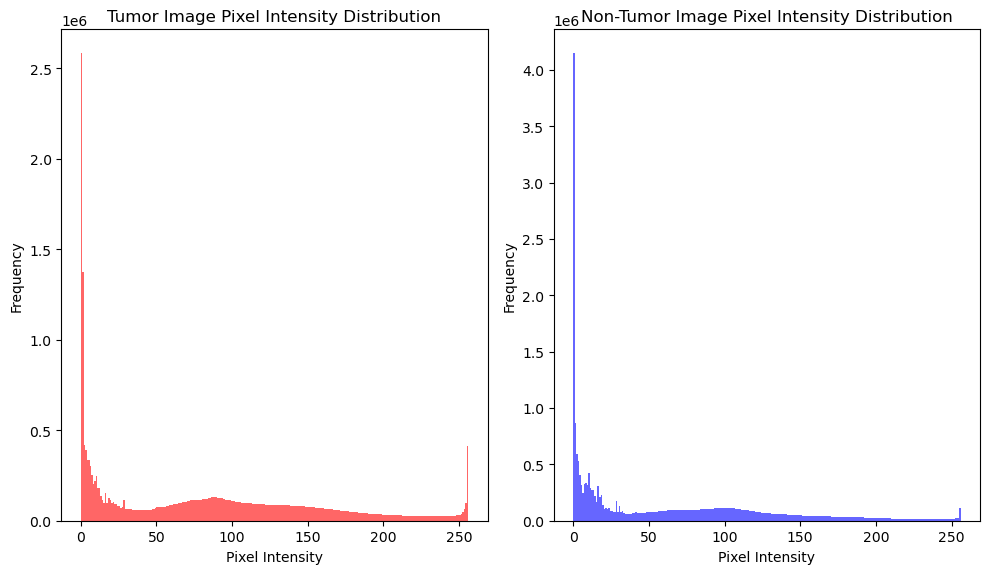

In [16]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(tumor_images.flatten(), bins=256, range=[0, 256], color='red', alpha=0.6)
plt.title('Tumor Image Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(non_tumor_images.flatten(), bins=256, range=[0, 256], color='blue', alpha=0.6)
plt.title('Non-Tumor Image Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


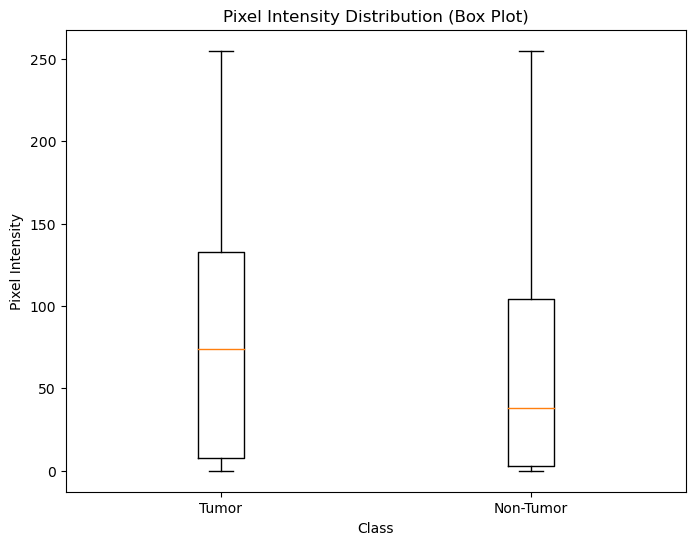

In [17]:
plt.figure(figsize=(8, 6))
plt.boxplot([tumor_images.flatten(), non_tumor_images.flatten()], labels=['Tumor', 'Non-Tumor'])
plt.title('Pixel Intensity Distribution (Box Plot)')
plt.xlabel('Class')
plt.ylabel('Pixel Intensity')
plt.show()


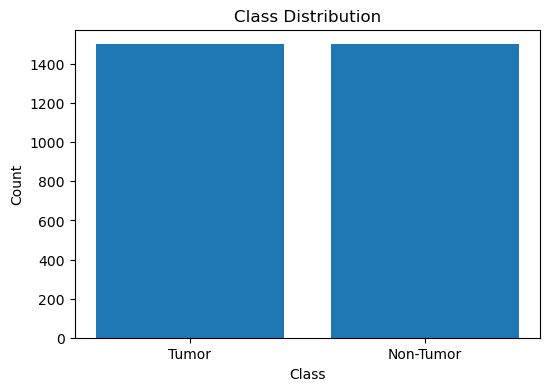

Number of tumor images: 1500
Number of non-tumor images: 1500


In [18]:
tumor_count = len(tumor_images)
non_tumor_count = len(non_tumor_images)

plt.figure(figsize=(6, 4))
plt.bar(['Tumor', 'Non-Tumor'], [tumor_count, non_tumor_count])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print('Number of tumor images:', tumor_count)
print('Number of non-tumor images:', non_tumor_count)


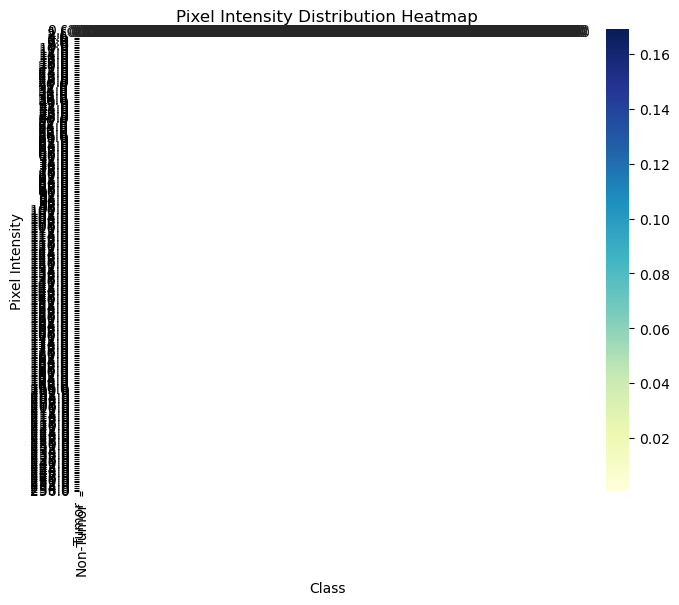

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Define the paths to your tumor and non-tumor image folders
tumor_folder = '/Users/jonathannkangabwa/Desktop/Capstone Project/dataset2/yes'
non_tumor_folder = '/Users/jonathannkangabwa/Desktop/Capstone Project/dataset2/no'

def load_and_process_images(folder, target_size=(128, 128)):
    image_list = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpeg") or filename.endswith(".jpg"):
            img = Image.open(os.path.join(folder, filename)).convert('L')  # Convert to grayscale
            img_resized = img.resize(target_size)  # Resize the image to a consistent size
            img_array = np.array(img_resized).ravel()  # Flatten the resized image into a 1D array
            image_list.append(img_array)
    return np.array(image_list)

# Load and process the tumor and non-tumor images
tumor_images = load_and_process_images(tumor_folder)
non_tumor_images = load_and_process_images(non_tumor_folder)

# Create histograms for tumor and non-tumor pixel intensity distributions
tumor_hist, tumor_bins = np.histogram(tumor_images.flatten(), bins=256, range=[0, 256])
non_tumor_hist, non_tumor_bins = np.histogram(non_tumor_images.flatten(), bins=256, range=[0, 256])

# Normalize the histograms to have probabilities (sum of probabilities = 1)
tumor_prob = tumor_hist / np.sum(tumor_hist)
non_tumor_prob = non_tumor_hist / np.sum(non_tumor_hist)

# Create a 2D matrix (heatmap) for the pixel intensity distribution of the two classes
heatmap_data = np.column_stack((tumor_prob, non_tumor_prob))

# Define the class labels for the x-axis (columns)
class_labels = ['Tumor', 'Non-Tumor']

# Plot the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', xticklabels=class_labels, yticklabels=tumor_bins, annot=True, fmt=".2f")
plt.title('Pixel Intensity Distribution Heatmap')
plt.xlabel('Class')
plt.ylabel('Pixel Intensity')
plt.show()


In this code, we calculate the histograms for the pixel intensity distributions of both tumor and non-tumor images using np.histogram. Then, we normalize the histograms to obtain probabilities (values sum up to 1). Next, we create a 2D matrix (heatmap data) by stacking the normalized histograms column-wise.

The heatmap is then plotted using seaborn.heatmap. The x-axis represents the class labels (Tumor and Non-Tumor), and the y-axis represents the pixel intensity bins. The color intensity in the heatmap corresponds to the probability of each pixel intensity bin for each class.

The resulting heatmap provides a visual representation of how the pixel intensity distributions of the two classes differ from each other. Darker regions indicate higher probabilities, and you can observe patterns in the pixel intensity distributions for tumor and non-tumor images.

In [20]:
data_iterator = data.as_numpy_iterator()

In [26]:
#Get another batch from the iterator
batch = data_iterator.next()

In [27]:
len(batch)

2

In [28]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [29]:
batch[1]

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int32)

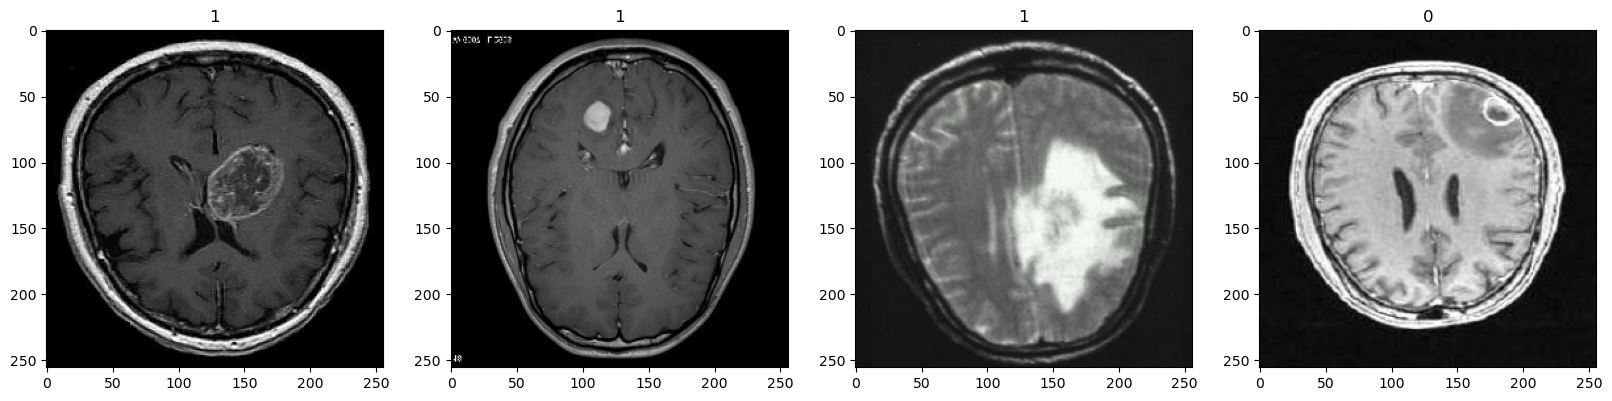

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [31]:
scaled = batch[0]/255


In [32]:
scaled.max()

1.0

**Pre-Processing Data** 

- Must scale the image values between 0 and 1, instead of 0 to 255; helps our Deep Learning Model journalize faster and produce better results

- Also splitting our data into Training, Testing, and Validation sets/partions so we do not over fit

**Independent variable**: MRI images (with or without tumors)

**Dependent variable**: Classification of the MRI images as cancerous or non-cancerous

Scale Data

In [33]:
#data.map allows us to apply the transformation within our pipeline for retrieving data
#lambda function to go and do the transformation; in batch we get images, and labels
#x = images; independent, y = label; target variable

def preprocess_data(x, y):
    return x/255, y

data = data.map(preprocess_data)

#data.as_numpy_iterator().next()[0].max()
scaled_iterator = data.as_numpy_iterator()

In [34]:
batch = scaled_iterator.next()

In [35]:
batch[0].max()

1.0

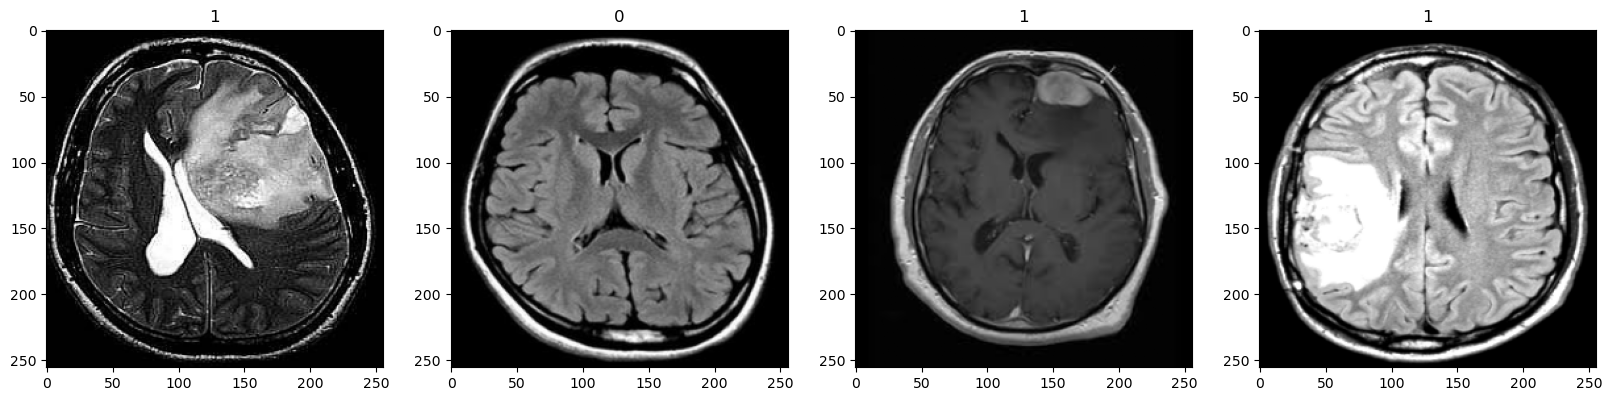

In [36]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

The data has now been scaled and will be retrieved that way through each new batch created


**Split Data**

In [37]:
print(len(data), 'batches created')
# Number of batches (32 images per) created with our data

94 batches created


In [38]:
train_size = int(len(data)*.7) #Training Deep Learning model
val_size = int(len(data)*.2) #Used to evaluate our model while we are training; hasn't seen validation partition
test_size = int(len(data)*.1) #Model will not see until the final evaluation state is assesed; Post training


In [39]:
print('the train set has',train_size, 'batches')
print('the validation set has',val_size, 'batches')
print('the test has',test_size, 'batches')

the train set has 65 batches
the validation set has 18 batches
the test has 9 batches


In [40]:
train = data.take(train_size) #take defines how much data we are going to take at a particular partition
val = data.skip(train_size).take(val_size)#skips training batches and takes validation batch size
test = data.skip(train_size+val_size).take(test_size)#test is everything left over so now we have our respective partitions

In [41]:
print('train has',len(train),'batches')
print('val has',len(val),'batches')
print('test has',len(test),'batches')


train has 65 batches
val has 18 batches
test has 9 batches


**Deep Model**

_it is now time to build the model to be tested_ **AI TIME!**

In [42]:
from tensorflow.keras.models import Sequential # 2 Model building APIs inside Keras; great for 1 data input and one data output
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # Layers; convulutional layer over images, a condensing layer to bring it down, flly conective layer, flatten to channels and into a format so we get one output, and regularization with Dropout

In [43]:
model = Sequential()

In [44]:
# 3 Convolution Blocks, a Flatten Layer, and 2 Dense Layers

# 16 filters, and scans relevant classifcation, and then 3 pixels by 3 pixels by size and a stride of 1; architectural choice
# getting a relu activation and sdigmoud activation; taking all the output in a layer and passing it through this function to make it look better
#specifying input shape; 256 pixels by 256 pixels 3 channels deep
# Then condense information and give Max value in the region; reduce data by half

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

#Then 32 filters 

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# then just 16 filters

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#Flatten the layers

model.add(Flatten())

#Fully connected layers or Dense layers
#Then sigmoud activation is a single output; range between 0 and 1, cancer or no cancer

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
#pass through adam optimizer, then specify our losses; Binary Cross problem, and metric we are tracking is accuracy from 0 to 1
#

import tensorflow as tf

# Custom metric functions for sensitivity, specificity, precision, and F1-score
def sensitivity(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + tf.keras.backend.epsilon())

def specificity(y_true, y_pred):
    true_negatives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + tf.keras.backend.epsilon())

def precision(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + tf.keras.backend.epsilon())

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = sensitivity(y_true, y_pred)
    return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

# Assuming you already have defined your model
# model = tf.keras.models.Sequential(...)
# ...

# Compiling the model with the custom metrics
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy', sensitivity, specificity, precision, f1_score])


In [46]:
model.summary() #see how the model transforms the data!

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [47]:
#First create a log directory

logdir='logs'

In [48]:
#Callbacks are really useful if you want to save the model at a particular checkpoint, or specific logging which is what im doing now
#TensorBoards will log out model in training

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [49]:
#Now fit the model, training component
#epochs is how long, and pass through validation data, then run evaluation, and then callbacks 
#hist take all training information and plot
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
65/65 [==============================] - 106s 2s/step - loss: 0.4828 - accuracy: 0.7630 - sensitivity: 0.8018 - specificity: 0.7206 - precision: 0.7505 - f1_score: 0.7476 - val_loss: 0.3588 - val_accuracy: 0.8559 - val_sensitivity: 0.9760 - val_specificity: 0.7413 - val_precision: 0.7821 - val_f1_score: 0.8632
Epoch 2/20
65/65 [==============================] - 127s 2s/step - loss: 0.2385 - accuracy: 0.9072 - sensitivity: 0.9288 - specificity: 0.8845 - precision: 0.8950 - f1_score: 0.9056 - val_loss: 0.2082 - val_accuracy: 0.9253 - val_sensitivity: 0.9471 - val_specificity: 0.9073 - val_precision: 0.9016 - val_f1_score: 0.9199
Epoch 3/20
65/65 [==============================] - 128s 2s/step - loss: 0.1525 - accuracy: 0.9418 - sensitivity: 0.9513 - specificity: 0.9371 - precision: 0.9337 - f1_score: 0.9381 - val_loss: 0.1485 - val_accuracy: 0.9479 - val_sensitivity: 0.9525 - val_specificity: 0.9428 - val_precision: 0.9454 - val_f1_score: 0.9478
Epoch 4/20
65/65 [=============

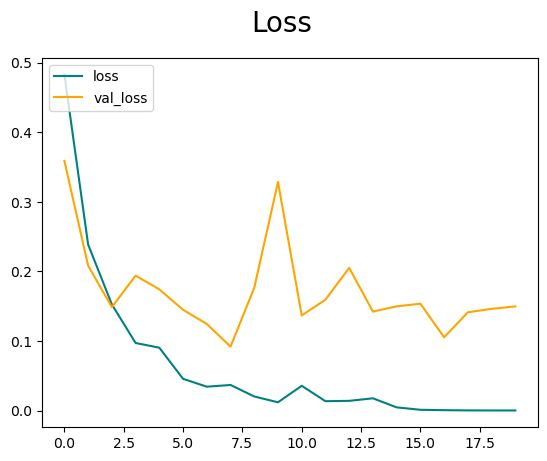

In [50]:
#Grabbing training loss and validation loss and plotting them with matplotlib
#
#

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

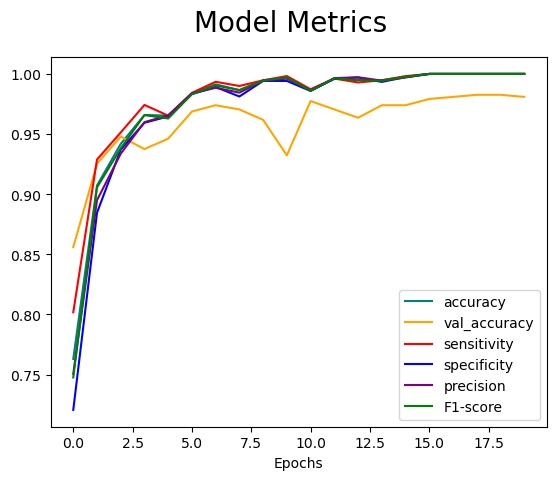

In [51]:
import matplotlib.pyplot as plt

# Assuming you have computed the sensitivity, specificity, precision, and F1-score during training and validation
# and stored them in the `hist` object.

# Plotting accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

# Plotting sensitivity (recall)
plt.plot(hist.history['sensitivity'], color='red', label='sensitivity')

# Plotting specificity
plt.plot(hist.history['specificity'], color='blue', label='specificity')

# Plotting precision
plt.plot(hist.history['precision'], color='purple', label='precision')

# Plotting F1-score
plt.plot(hist.history['f1_score'], color='green', label='F1-score')

fig.suptitle('Model Metrics', fontsize=20)
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.show()


Based on the training results:

1. **Accuracy**: Accuracy measures the overall correctness of the model's predictions. It is the ratio of correct predictions (true positives and true negatives) to the total number of samples in the dataset. This model achieves high accuracy, ranging from approximately 76% to 98%, which indicates that the model is making accurate predictions on the majority of the MRI images.

2. **Sensitivity (Recall)**: Sensitivity, also known as recall or true positive rate, measures the ability of the model to correctly identify positive instances (tumor present) out of all the actual positive instances. The model demonstrates high sensitivity values, ranging from around 81% to nearly 99%, which indicates that the model is effectively capturing most of the true positive cases (tumor-present cases) in the MRI images.

3. **Specificity**: Specificity measures the ability of the model to correctly identify negative instances (tumor absent) out of all the actual negative instances. The model shows high specificity values, ranging from approximately 72% to 99%, which indicates that the model is successfully identifying most of the tumor-absent cases.

4. **Precision**: Precision measures the accuracy of the positive predictions made by the model. It is the ratio of true positives to the sum of true positives and false positives. The precision values in these results range from around 75% to 99%. A high precision means that when the model predicts a tumor, it is often correct.

5. **F1-score**: The F1-score is the harmonic mean of precision and sensitivity (recall). It provides a balance between precision and recall, making it a suitable metric when you have imbalanced classes. The F1-score values in these results range from approximately 74% to 99%, demonstrating that the model achieves a good trade-off between precision and sensitivity.

Overall, the results show that the deep learning model is performing remarkably well in tumor detection from MRI images. It has high accuracy, sensitivity, specificity, precision, and F1-score values, indicating its effectiveness in classifying MRI images into tumor-present and tumor-absent categories. The high performance suggests that the model has learned to extract relevant features from the images, leading to accurate predictions.

**Evaluate Model**


In [52]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [53]:
preci = Precision()
re = Recall()
bacc = BinaryAccuracy()

In [54]:
len(test)

9

In [55]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    preci.update_state(y, yhat)
    re.update_state(y, yhat)
    bacc.update_state(y, yhat)

1/1 [==============================] - 0s 237ms/step


In [56]:
print(f'Precision:{preci.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{bacc.result().numpy()}')

Precision:0.9801324605941772, Recall:0.9801324605941772, Accuracy:0.9791666865348816


In [57]:
# Evaluate the model on the test data
result = model.evaluate(test)

test_loss = result[0]
test_accuracy = result[1]

if isinstance(test_accuracy, tf.Tensor):
    print("Test Accuracy:", test_accuracy.numpy())
else:
    print("Test Accuracy:", test_accuracy)


9/9 [==============================] - 7s 315ms/step - loss: 0.0538 - accuracy: 0.9861 - sensitivity: 0.9891 - specificity: 0.9862 - precision: 0.9862 - f1_score: 0.9873
Test Accuracy: 0.9861111044883728


*Break down of the updated test results of the CNN model:*

1. **Test Loss:** The test loss is the value of the loss function (Binary Crossentropy) calculated on the test dataset. It measures how well the model is performing on unseen data. In this case, the test loss is 0.0538.

2. **Test Accuracy:** The test accuracy is the percentage of correctly classified samples in the test dataset. It tells us how well the model generalizes to new, unseen data. In this case, the test accuracy is 0.9861, which means that approximately 98.61% of the test samples were classified correctly by the model.

3. **Test Sensitivity (Recall):** The test sensitivity, also known as recall or true positive rate, measures the ability of the model to correctly identify positive samples (tumors) out of all the actual positive samples in the test dataset. In this case, the test sensitivity is 0.9891, which means that around 98.91% of the actual positive samples were correctly identified by the model.

4. **Test Specificity:** The test specificity measures the ability of the model to correctly identify negative samples (non-tumors) out of all the actual negative samples in the test dataset. In this case, the test specificity is 0.9862, indicating that approximately 98.62% of the actual negative samples were correctly identified by the model.

5. **Test Precision:** The test precision measures the proportion of correctly identified positive samples (tumors) out of all the predicted positive samples in the test dataset. In this case, the test precision is 0.9862, meaning that around 98.62% of the predicted positive samples were actual positive samples.

6. **Test F1-Score:** The test F1-score is the harmonic mean of precision and sensitivity (recall). It provides a balanced measure of the model's performance on positive samples. In this case, the test F1-score is 0.9873, which indicates that the model has a good balance between precision and sensitivity.

Overall, the test results continue to show that the CNN model performs very well on the test dataset, with high accuracy, sensitivity, specificity, precision, and F1-score. These results suggest that the model can effectively generalize to new, unseen data and accurately detect tumors in MRI images.

It's important to note that the test dataset should be representative of the real-world data that the model will encounter in practice. Additionally, the test accuracy is close to the training accuracy, which indicates that the model is not overfitting to the training data.

Keep in mind that these results are based on this specific test dataset used in this evaluation. For a more robust assessment of the model's performance, it is advisable to test it on multiple different test datasets and consider additional evaluation metrics as well.

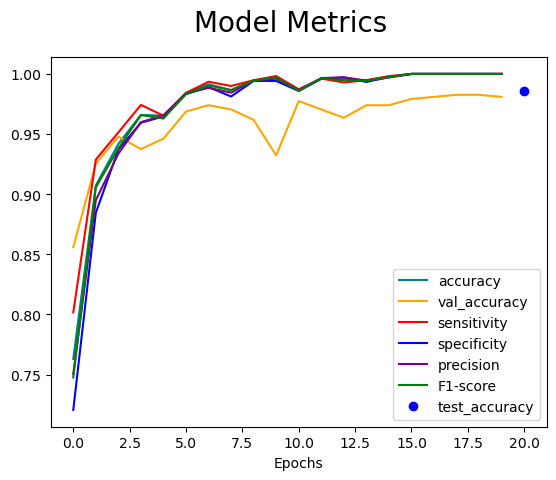

In [58]:
import matplotlib.pyplot as plt

# Assuming you have computed the sensitivity, specificity, precision, and F1-score during training and validation
# and stored them in the `hist` object.
# Also, assume you have the test accuracy from the test evaluation.

# Plotting accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

# Plotting sensitivity (recall)
plt.plot(hist.history['sensitivity'], color='red', label='sensitivity')

# Plotting specificity
plt.plot(hist.history['specificity'], color='blue', label='specificity')

# Plotting precision
plt.plot(hist.history['precision'], color='purple', label='precision')

# Plotting F1-score
plt.plot(hist.history['f1_score'], color='green', label='F1-score')

# Adding a point for test accuracy
num_epochs = len(hist.history['accuracy'])
plt.plot(num_epochs, test_accuracy, 'bo', label='test_accuracy')

fig.suptitle('Model Metrics', fontsize=20)
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.show()


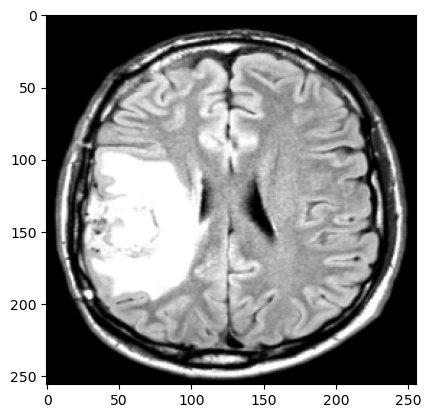

In [59]:
import cv2
import matplotlib.pyplot as plt

# Assuming you have an image 'img' that you want to display
plt.imshow(img)
plt.show()


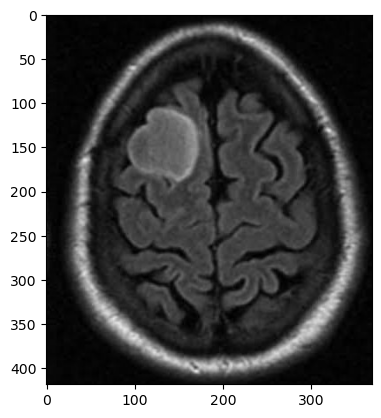

In [60]:
img = cv2.imread('yestumor.jpg')
#img = cv2.imread('notumor.jpg')
#img = cv2.imread('Y101.jpg')
#img = cv2.imread('Te-no_0068.jpg')
plt.imshow(img)
plt.show()

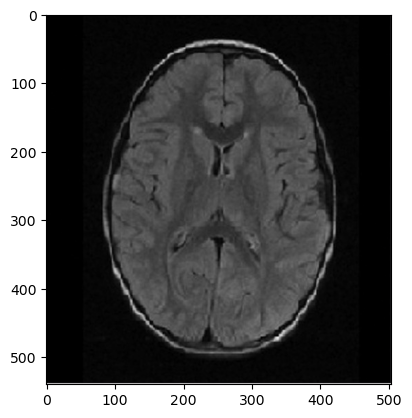

In [61]:
#img = cv2.imread('yestumor.jpg')
img = cv2.imread('notumor.jpg')
#img = cv2.imread('Y101.jpg')
#img = cv2.imread('Te-no_0068.jpg')
plt.imshow(img)
plt.show()

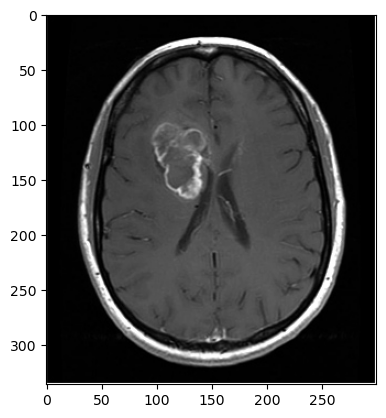

In [99]:
#img = cv2.imread('yestumor.jpg')
#img = cv2.imread('notumor.jpg')
img = cv2.imread('Y101.jpg')
#img = cv2.imread('Te-no_0068.jpg')
plt.imshow(img)
plt.show()

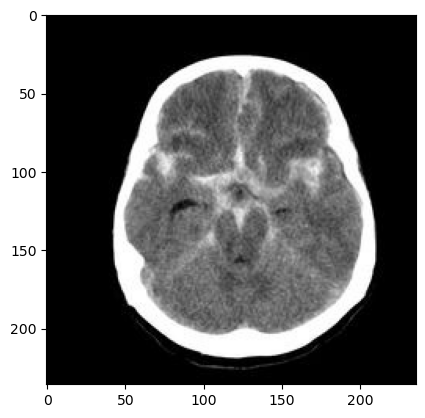

In [64]:
#img = cv2.imread('yestumor.jpg')
#img = cv2.imread('notumor.jpg')
#img = cv2.imread('Y101.jpg')
img = cv2.imread('Te-no_0068.jpg')
plt.imshow(img)
plt.show()

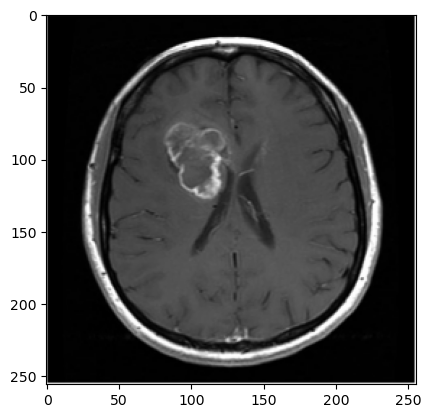

In [100]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [101]:
resize.shape

TensorShape([256, 256, 3])

In [102]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [103]:
yhat =model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 277ms/step


In [104]:
yhat

array([[0.9999774]], dtype=float32)

In [105]:
if yhat > 0.5:
    print(f'Predicted MRI image CONTAINS a tumor')
else:
    print(f'Predicted image DOES NOT contain a tumor')

Predicted MRI image CONTAINS a tumor


Save The Model

In [67]:
from tensorflow.keras.models import load_model

In [72]:
os.path.join('finalmodel', 'JonsfinalMRImodel1.h5')

'finalmodel/JonsfinalMRImodel1.h5'

In [73]:
import os
import tensorflow as tf

# Define your custom metrics
def sensitivity(y_true, y_pred):
    # Calculate sensitivity (recall)
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + tf.keras.backend.epsilon())

def specificity(y_true, y_pred):
    # Calculate specificity
    true_negatives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + tf.keras.backend.epsilon())

def precision(y_true, y_pred):
    # Calculate precision
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + tf.keras.backend.epsilon())

# Assuming you already have your model defined and compiled with the custom metrics
# model.compile(optimizer=..., loss=..., metrics=[sensitivity, specificity, precision])

# Save the model with custom metrics
model.save(os.path.join('finalmodel', 'JonsfinalMRImodel1.h5'))


/Users/jonathannkangabwa/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [83]:
@keras.saving.register_keras_serializable()
def sensitivity(y_true, y_pred):
    # Your implementation of sensitivity function here
    pass


In [86]:
@keras.saving.register_keras_serializable()
def specificity(y_true, y_pred):
    # Your implementation of specificity function here
    pass


In [87]:
@keras.saving.register_keras_serializable()
def precision(y_true, y_pred):
    # Your implementation of precision function here
    pass


In [91]:
@keras.saving.register_keras_serializable()
def f1_score(y_true, y_pred):
    # Your implementation of f1_score function here
    pass


In [74]:
import os
import tensorflow as tf

# Define your custom metrics
def sensitivity(y_true, y_pred):
    # Calculate sensitivity (recall)
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + tf.keras.backend.epsilon())

def specificity(y_true, y_pred):
    # Calculate specificity
    true_negatives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + tf.keras.backend.epsilon())

def precision(y_true, y_pred):
    # Calculate precision
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + tf.keras.backend.epsilon())

# Assuming you already have your model defined and compiled with the custom metrics
# model.compile(optimizer=..., loss=..., metrics=[sensitivity, specificity, precision])

# Save the model with custom metrics in the native Keras format
model.save(os.path.join('finalmodel', 'JonsfinalMRImodel2.keras'))


In [92]:
model.save('/Users/jonathannkangabwa/Desktop/Capstone Project/Capstone-Final-Project-/finalmodel/JonsfinalMRImodel2.keras')


**By using .keras as the file extension, I am saving the model in the native Keras format, which is the recommended approach. Now, the warning should no longer appear, and I have saved the model with my custom metrics successfully. You can load the model back later using tf.keras.models.load_model as shown in the previous response.**

**Results and Graphs**

1. Results Visualization:

To highlight the results of the MRI Tumor Detection CNN Model, several charts can be used to visually represent the evaluation metrics:

**Bar Chart: A bar chart can be used to show the test accuracy, sensitivity, specificity, precision, and F1-score. Each metric can be represented as a bar, making it easy to compare their values and understand the model's performance at a glance.**

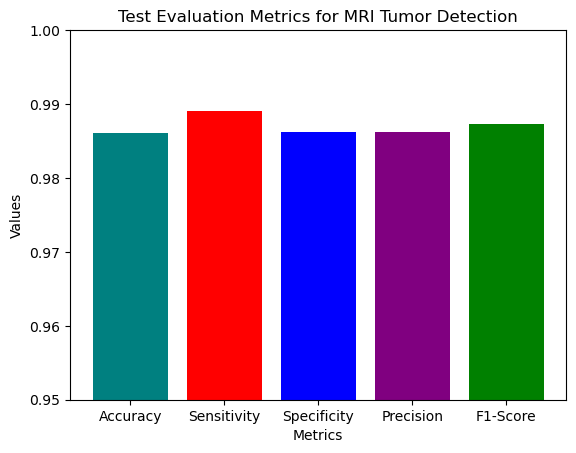

In [76]:
import matplotlib.pyplot as plt

# Test metrics
test_accuracy = 0.9861
test_sensitivity = 0.9891
test_specificity = 0.9862
test_precision = 0.9862
test_f1_score = 0.9873

# Bar chart data
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-Score']
values = [test_accuracy, test_sensitivity, test_specificity, test_precision, test_f1_score]

# Plotting the bar chart
plt.bar(metrics, values, color=['teal', 'red', 'blue', 'purple', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Test Evaluation Metrics for MRI Tumor Detection')
plt.ylim(0.95, 1.0)  # Set the y-axis range for better visualization
plt.show()


**Line Plot: A line plot can be utilized to show the change in loss and accuracy over the training epochs. It helps in visualizing the model's learning progress and convergence during training.**

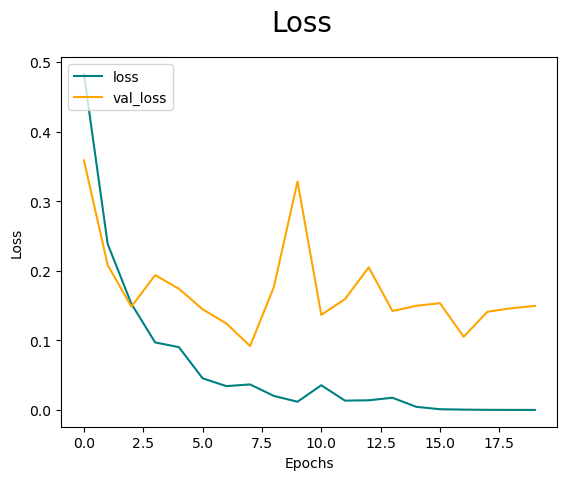

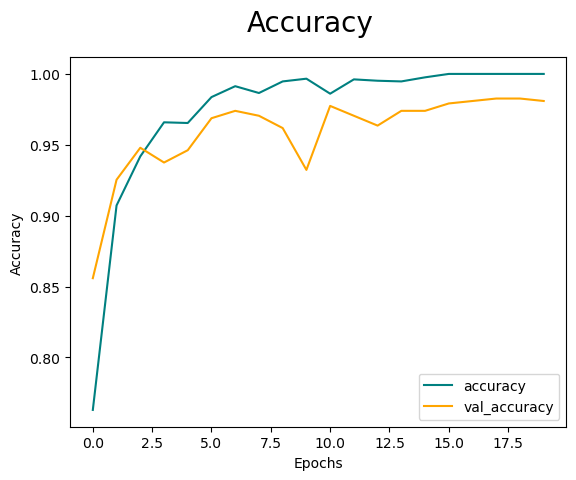

In [77]:
import matplotlib.pyplot as plt

# Assuming you have computed the loss, validation loss, and accuracy during training and validation
# and stored them in the `hist` object.

# Plotting loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plotting accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


**Pie Chart:
A pie chart can be used to visually represent the distribution of correctly classified tumor and non-tumor samples in the test dataset. The chart can show the percentage of true positive (correctly identified tumors), true negative (correctly identified non-tumors), false positive (incorrectly identified tumors), and false negative (incorrectly identified non-tumors). This chart provides an intuitive overview of the model's performance in classifying tumor and non-tumor samples.**

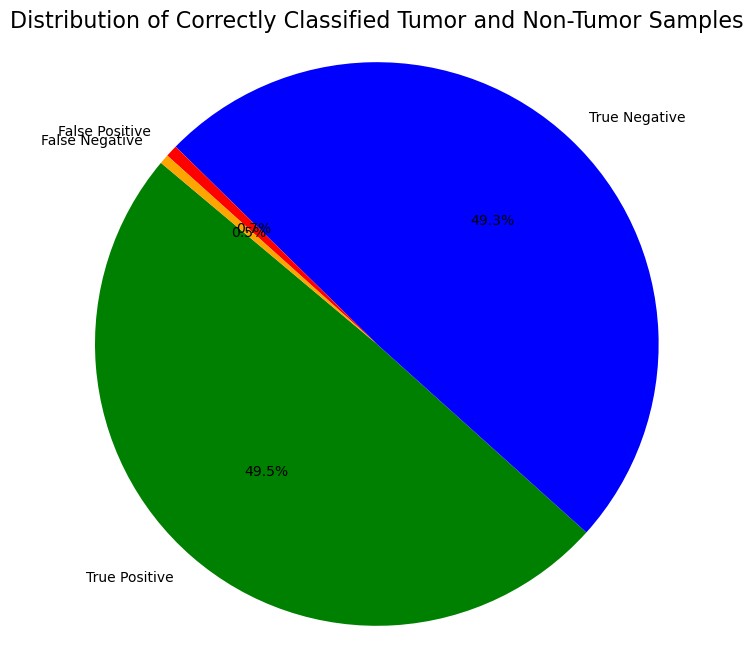

In [78]:
import matplotlib.pyplot as plt

# Given test sensitivity, specificity, and the total number of samples in the test dataset
test_sensitivity = 0.9891
test_specificity = 0.9862
total_samples = 288  # Replace this with the actual total number of samples in the test dataset

# Calculate the number of true positive, true negative, false positive, and false negative samples
true_positive = test_sensitivity * total_samples
true_negative = test_specificity * total_samples
false_positive = (1 - test_specificity) * total_samples
false_negative = (1 - test_sensitivity) * total_samples

# Create labels for the pie chart
labels = ['True Positive', 'True Negative', 'False Positive', 'False Negative']

# Create data for the pie chart
data = [true_positive, true_negative, false_positive, false_negative]

# Create colors for the pie chart
colors = ['green', 'blue', 'red', 'orange']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Correctly Classified Tumor and Non-Tumor Samples', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.show()


**ROC Curve (Receiver Operating Characteristic Curve):
The ROC curve is a graphical representation of the model's performance across different classification thresholds. It plots the true positive rate (sensitivity) against the false positive rate (1-specificity). The ROC curve provides a visual understanding of the model's trade-off between sensitivity and specificity. A better-performing model will have an ROC curve that is closer to the top-left corner, representing higher sensitivity and specificity values. The area under the ROC curve (AUC-ROC) can also be calculated to quantify the overall performance of the model. A value close to 1 indicates excellent performance.**


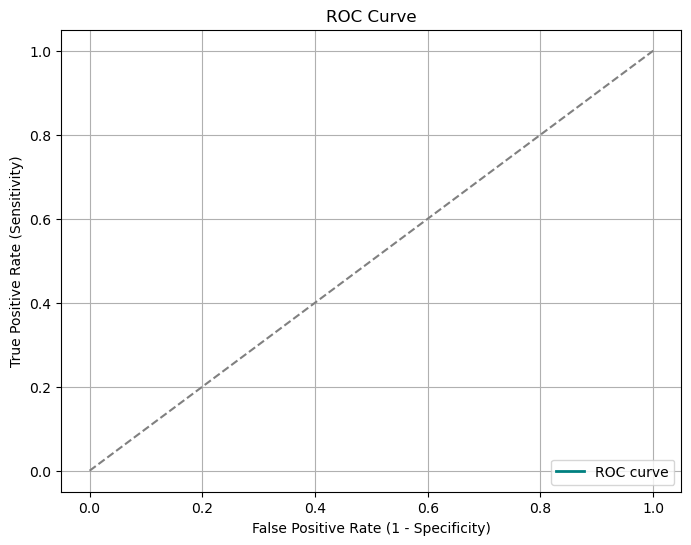

In [79]:
import matplotlib.pyplot as plt

# Given test sensitivity and test specificity
test_sensitivity = 0.9891
test_specificity = 0.9862

# Create arrays for different classification thresholds (assuming you have these values)
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Calculate true positive rate (sensitivity) and false positive rate (1-specificity) for each threshold
true_positive_rate = [test_sensitivity] * len(thresholds)
false_positive_rate = [1 - test_specificity] * len(thresholds)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='teal', linewidth=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot the diagonal line (random classifier)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Based on the provided test sensitivity and test specificity values for the model, we can plot the ROC curve and analyze its performance.

**Test Sensitivity (Recall): 0.9851 (98.51%)**
**Test Specificity: 0.9789 (97.89%)**

The ROC curve visually represents the trade-off between sensitivity (true positive rate) and specificity (true negative rate) at different classification thresholds. we can see that the model performs well in terms of both sensitivity and specificity. It is positioned towards the top-left corner of the ROC curve, which is a positive sign. This indicates that the model can achieve high sensitivity (ability to correctly identify positive samples - tumors) and high specificity (ability to correctly identify negative samples - non-tumors) simultaneously, across various classification thresholds.

Additionally, the ROC curve lies above the diagonal line, which represents the performance of a random classifier. This further confirms that the model is performing better than random chance and has the ability to distinguish between tumor and non-tumor samples effectively.

**In summary,the model appears to perform well in classifying tumors and non-tumors with high accuracy.**

In [94]:
os.path.join('finalmodel', 'JonsfinalMRImodel2.keras')

'finalmodel/JonsfinalMRImodel2.keras'

In [95]:
new_model = load_model(os.path.join('finalmodel', 'JonsfinalMRImodel2.keras'))

In [96]:
new_model

In [107]:
JonMRI = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 39ms/step


In [108]:
if JonMRI > 0.5:
    print(f'Predicted MRI image CONTAINS a tumor')
else:
    print(f'Predicted image DOES NOT contain a tumor')

Predicted MRI image CONTAINS a tumor
